In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math

In [ ]:
df = pd.read_csv("/content/54d3952f-c709-48af-a7b7-f66947482369_Data.csv")

In [ ]:
df[15:20]

,Series Name,Series Code,Time,Time Code,Nigeria [NGA],Brazil [BRA],China [CHN],Ethiopia [ETH],India [IND],Germany [DEU],Bangladesh [BGD],Indonesia [IDN],South Africa [ZAF],United States [USA],Norway [NOR],Japan [JPN],Haiti [HTI]
15,"School enrollment, primary (% gross)",SE.PRM.ENRR,2018.0,YR2018,84.6760635375977,108.623291015625,98.1703567504883,..,101.097955965022,102.645378112793,112.427695363555,104.648287253309,101.95011138916,101.256561279297,99.1744232177734,102.099906921387,..
16,"School enrollment, primary (% gross)",SE.PRM.ENRR,2019.0,YR2019,83.2573913283786,107.407470703125,98.2354125976562,..,99.5039236144817,102.547470092773,..,102.597018482181,101.256492614746,100.981300354004,99.0806503295898,102.652282714844,..
17,"School enrollment, primary (% gross)",SE.PRM.ENRR,2020.0,YR2020,87.3721008300781,105.498199462891,99.0244293212891,114.557322752629,101.291253449929,101.996658325195,118.429237365723,102.437991856992,99.7352600097656,100.305793762207,98.8857498168945,102.736831665039,..
18,"School enrollment, primary (% gross)",SE.PRM.ENRR,2021.0,YR2021,86.7234268188477,103.4716796875,99.4303970336914,102.679576994027,102.316123319201,101.346549987793,115.448180712787,101.990710635544,98.1153106689453,98.3054885864258,98.9731903076172,102.218322753906,..
19,"School enrollment, primary (% gross)",SE.PRM.ENRR,2022.0,YR2022,..,103.970321655273,100.171730041504,85.5312668839719,111.084455603874,100.218132019043,117.659457498739,100.64499288828,96.1027221679688,96.9717330932617,98.9667587280273,102.158706665039,..


The Data is directly collected from World Bank Group.

Hence, it is so messed due to raw collection of data which is highly precise to digits precision.

So as to get it, we need to explicitly specify rows, columns, pages about countries, years and development indicators.

Now, to use it as desired way, we need to go through a rigourous cleaning process.

Data Cleaning -

In [ ]:
df.dtypes

,0
Series Name,object
Series Code,object
Time,float64
Time Code,object
Nigeria [NGA],object
Brazil [BRA],object
China [CHN],object
Ethiopia [ETH],object
India [IND],object
Germany [DEU],object


In [ ]:
df.shape

(126, 17)

Now our first aim is to reduce to 15 columns.

In [ ]:
df.drop(columns=['Series Code', 'Time Code'], inplace=True)

In [ ]:
df.columns

Index(['Series Name', 'Time', 'Nigeria [NGA]', 'Brazil [BRA]', 'China [CHN]',
       'Ethiopia [ETH]', 'India [IND]', 'Germany [DEU]', 'Bangladesh [BGD]',
       'Indonesia [IDN]', 'South Africa [ZAF]', 'United States [USA]',
       'Norway [NOR]', 'Japan [JPN]', 'Haiti [HTI]'],
      dtype='object')

In [ ]:
df.rename(columns={'Time':'Year', 'Nigeria [NGA]':'Nigeria', 'Brazil [BRA]':'Brazil', 'China [CHN]':'China',
       'Ethiopia [ETH]':'Ethiopia', 'India [IND]':'India', 'Germany [DEU]':'Germany', 'Bangladesh [BGD]':'Bangladesh',
       'Indonesia [IDN]':'Indonesia', 'South Africa [ZAF]':'South Africa', 'United States [USA]':'United States',
       'Norway [NOR]':'Norway', 'Japan [JPN]':'Japan', 'Haiti [HTI]':'Haiti'}, inplace=True)

In [ ]:
df.columns

Index(['Series Name', 'Year', 'Nigeria', 'Brazil', 'China', 'Ethiopia',
       'India', 'Germany', 'Bangladesh', 'Indonesia', 'South Africa',
       'United States', 'Norway', 'Japan', 'Haiti'],
      dtype='object')

In [ ]:
df.drop(df.index[121:], inplace=True)

In [ ]:
df2 = pd.melt(df, id_vars=['Series Name', 'Year'], value_vars=['Nigeria', 'Brazil', 'China', 'Ethiopia',
       'India', 'Germany', 'Bangladesh', 'Indonesia', 'South Africa',
       'United States', 'Norway', 'Japan', 'Haiti'], var_name='Country', value_name='Values')

In [ ]:
df3 = df2.pivot(index=['Year', 'Country'], columns='Series Name', values='Values')

In [ ]:
df3.reset_index(inplace=True)

A clear looking data frame is created.

In [ ]:
df3.head(10)

Series Name,Year,Country,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Current health expenditure (% of GDP),"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",GDP per capita (current US$),"Government expenditure on education, total (% of GDP)","Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Mortality rate, under-5 (per 1,000 live births)",Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population),"School enrollment, primary (% gross)"
0,2014.0,Bangladesh,16.8,62.4,2.27915168,54.308,1094.46199702838,2.09871673583984,70.016,61,40.7,..,..
1,2014.0,Brazil,95.4,99.7,8.39644146,59.714,12274.9939689363,5.94848012924194,74.823,92,16.3,4.7,110.316459655762
2,2014.0,China,68.8,100,4.77790594,66.425,7636.07434020616,4.10536003112793,76.714,..,11.5,4.7,97.9485015869141
3,2014.0,Ethiopia,3.8,27.2,4.03365517,77.716,549.986577082588,4.79265069961548,62.927,..,68.2,..,96.1562440354136
4,2014.0,Germany,100,100,11.02588272,57.371,48971.0824722599,4.92102003097534,81.090243902439,..,4,0,102.62181854248
5,2014.0,Haiti,3.8,39.6,4.52035809,56.837,1460.18898613914,1.75226998329163,62.969,..,71.9,..,..
6,2014.0,India,44.4,85.1,3.61956549,49.134,1553.88396075118,3.89878034591675,68.932,..,46.3,..,111.584541320801
7,2014.0,Indonesia,63,97,2.96433568,63.926,3441.06808455308,3.28800988197327,69.292,95,28.6,25.7,110.910578364806
8,2014.0,Japan,100,100,10.7290144,57.31,38475.3952461838,3.41529989242554,83.5878048780488,..,2.9,0.7,102.415283203125
9,2014.0,Nigeria,4.1,54.2,3.34840417,77.829,3088.72131316169,0.470742553472519,51.94,..,127.9,..,87.4456405639648


Further Cleaning is required to make it more readable.

In [ ]:
df3.replace('..', np.nan, inplace=True)

In [ ]:
df3.duplicated().sum()

np.int64(0)

In [ ]:
df3.isnull().sum()

,0
Series Name,
Year,0
Country,0
Access to clean fuels and technologies for cooking (% of population),26
Access to electricity (% of population),13
Current health expenditure (% of GDP),25
"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",0
GDP per capita (current US$),13
"Government expenditure on education, total (% of GDP)",25
"Life expectancy at birth, total (years)",13


In [ ]:
df3.columns

Index(['Year', 'Country',
       'Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity (% of population)',
       'Current health expenditure (% of GDP)',
       'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',
       'GDP per capita (current US$)',
       'Government expenditure on education, total (% of GDP)',
       'Life expectancy at birth, total (years)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)',
       'School enrollment, primary (% gross)'],
      dtype='object', name='Series Name')

In [ ]:
df3.dtypes

,0
Series Name,
Year,float64
Country,object
Access to clean fuels and technologies for cooking (% of population),object
Access to electricity (% of population),object
Current health expenditure (% of GDP),object
"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",object
GDP per capita (current US$),object
"Government expenditure on education, total (% of GDP)",object
"Life expectancy at birth, total (years)",object


In [ ]:
for col in ['Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity (% of population)',
       'Current health expenditure (% of GDP)',
       'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',
       'GDP per capita (current US$)',
       'Government expenditure on education, total (% of GDP)',
       'Life expectancy at birth, total (years)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)',
       'School enrollment, primary (% gross)']:
  df3[col] = df3[col].astype('float64')

In [ ]:
df3.dtypes

,0
Series Name,
Year,float64
Country,object
Access to clean fuels and technologies for cooking (% of population),float64
Access to electricity (% of population),float64
Current health expenditure (% of GDP),float64
"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",float64
GDP per capita (current US$),float64
"Government expenditure on education, total (% of GDP)",float64
"Life expectancy at birth, total (years)",float64


In [ ]:
df3.isnull().any()

,0
Series Name,
Year,False
Country,False
Access to clean fuels and technologies for cooking (% of population),True
Access to electricity (% of population),True
Current health expenditure (% of GDP),True
"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",False
GDP per capita (current US$),True
"Government expenditure on education, total (% of GDP)",True
"Life expectancy at birth, total (years)",True


In [ ]:
df3.isnull().sum()

,0
Series Name,
Year,0
Country,0
Access to clean fuels and technologies for cooking (% of population),26
Access to electricity (% of population),13
Current health expenditure (% of GDP),25
"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",0
GDP per capita (current US$),13
"Government expenditure on education, total (% of GDP)",25
"Life expectancy at birth, total (years)",13


In [ ]:
df3

Series Name,Year,Country,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Current health expenditure (% of GDP),"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",GDP per capita (current US$),"Government expenditure on education, total (% of GDP)","Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Mortality rate, under-5 (per 1,000 live births)",Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population),"School enrollment, primary (% gross)"
0,2014.0,Bangladesh,16.8,62.4,2.279152,54.308,1094.461997,2.098717,70.016000,61.0,40.7,NaN,NaN
1,2014.0,Brazil,95.4,99.7,8.396441,59.714,12274.993969,5.948480,74.823000,92.0,16.3,4.7,110.316460
2,2014.0,China,68.8,100.0,4.777906,66.425,7636.074340,4.105360,76.714000,NaN,11.5,4.7,97.948502
3,2014.0,Ethiopia,3.8,27.2,4.033655,77.716,549.986577,4.792651,62.927000,NaN,68.2,NaN,96.156244
4,2014.0,Germany,100.0,100.0,11.025883,57.371,48971.082472,4.921020,81.090244,NaN,4.0,0.0,102.621819
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2024.0,Japan,NaN,NaN,NaN,61.572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,2024.0,Nigeria,NaN,NaN,NaN,80.118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,2024.0,Norway,NaN,NaN,NaN,62.555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,2024.0,South Africa,NaN,NaN,NaN,39.116,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I think we should first make sure to handle null values before rounding off the values to get best results.

Step 1: Just dropping columns which have more than 30% nulls

In [ ]:
df3.dropna(thresh=int(len(df3)*0.7), axis=1, inplace=True)

Step 2: Trying to fill null values in a logical way

A manual check of all null values before filling.

In [ ]:
df3[3:143:13]

Series Name,Year,Country,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Current health expenditure (% of GDP),"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",GDP per capita (current US$),"Government expenditure on education, total (% of GDP)","Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)","School enrollment, primary (% gross)"
3,2014.0,Ethiopia,3.8,27.2,4.033655,77.716,549.986577,4.792651,62.927,68.2,96.156244
16,2015.0,Ethiopia,4.3,29.0,3.823168,76.053,621.845674,5.153361,63.592,64.9,97.119007
29,2016.0,Ethiopia,4.9,42.9,3.600338,74.381,696.195885,5.061514,64.162,61.7,NaN
42,2017.0,Ethiopia,5.4,44.3,3.453369,72.723,745.632449,5.499051,64.766,58.9,104.203674
55,2018.0,Ethiopia,6.0,44.8,3.303718,71.059,747.968144,5.220112,65.257,56.4,NaN
68,2019.0,Ethiopia,6.6,48.0,3.242871,69.432,828.708972,4.480869,65.741,54.1,NaN
81,2020.0,Ethiopia,7.4,51.1,3.480963,66.583,905.313176,4.090565,65.969,52.0,114.557323
94,2021.0,Ethiopia,8.0,54.2,3.207539,65.567,910.947840,4.065249,65.330,50.0,102.679577
107,2022.0,Ethiopia,8.8,55.4,2.852746,65.741,1011.073286,3.736495,66.897,48.2,85.531267
120,2023.0,Ethiopia,NaN,55.4,NaN,65.470,1272.016282,NaN,67.315,46.5,84.472179


Before filling the values lets check the statistical summary of the data.

In [ ]:
df3.describe()

Series Name,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Current health expenditure (% of GDP),"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",GDP per capita (current US$),"Government expenditure on education, total (% of GDP)","Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)","School enrollment, primary (% gross)"
count,143.000000,117.000000,130.000000,118.000000,143.000000,130.000000,118.000000,130.000000,130.000000,105.000000
mean,2019.000000,64.947436,85.591538,7.121423,59.729014,21033.821148,3.866484,72.058731,31.281538,101.807521
std,3.173393,38.015375,21.353859,4.349856,8.917227,27579.876934,2.077314,8.668713,32.010540,7.851055
min,2014.000000,3.800000,27.200000,2.257622,36.798000,549.986577,0.348517,51.939000,2.300000,76.463099
25%,2016.000000,21.900000,77.900000,3.347208,56.570000,1979.009630,1.789216,65.522000,6.500000,99.080650
50%,2019.000000,83.800000,99.400000,5.259091,59.241000,6528.561094,4.108346,71.850500,24.050000,101.821442
75%,2022.000000,100.000000,100.000000,10.507392,63.991000,39968.357404,5.440255,78.677439,41.000000,105.498199
max,2024.000000,100.000000,100.000000,18.813253,80.118000,108798.451166,8.372820,84.560000,127.900000,119.512833


Values looks so wide spread and diverse but they are all combined so lets take and compare the std., mean, median of all diffrent countries separately and observe any significant issue.

In [ ]:
for country in df3['Country'].unique():
  print(f"Statistical Summary of {country} :- (only where skewness is high)")
  print("---------------------------------------------------------")
  stats = df3[df3['Country']==country].describe().loc[['mean', 'std', '50%']]
  stat_norm = stats.pipe(lambda x: ((x.loc['mean']-x.loc['50%']).abs())/x.loc['std']).sort_values(ascending=False).head(2)
  display(stat_norm)

Statistical Summary of Bangladesh :- (only where skewness is high)
---------------------------------------------------------


,0
Series Name,
"Mortality rate, under-5 (per 1,000 live births)",0.303912
"Life expectancy at birth, total (years)",0.283334


Statistical Summary of Brazil :- (only where skewness is high)
---------------------------------------------------------


,0
Series Name,
Current health expenditure (% of GDP),0.470222
"School enrollment, primary (% gross)",0.464315


Statistical Summary of China :- (only where skewness is high)
---------------------------------------------------------


,0
Series Name,
"Life expectancy at birth, total (years)",0.409966
"School enrollment, primary (% gross)",0.282805


Statistical Summary of Ethiopia :- (only where skewness is high)
---------------------------------------------------------


,0
Series Name,
GDP per capita (current US$),0.194221
"Government expenditure on education, total (% of GDP)",0.187610


Statistical Summary of Germany :- (only where skewness is high)
---------------------------------------------------------


,0
Series Name,
"Mortality rate, under-5 (per 1,000 live births)",0.363470
"Government expenditure on education, total (% of GDP)",0.301824


Statistical Summary of Haiti :- (only where skewness is high)
---------------------------------------------------------


,0
Series Name,
"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",0.553076
GDP per capita (current US$),0.343248


Statistical Summary of India :- (only where skewness is high)
---------------------------------------------------------


,0
Series Name,
"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",0.375430
Access to electricity (% of population),0.330638


Statistical Summary of Indonesia :- (only where skewness is high)
---------------------------------------------------------


,0
Series Name,
"Government expenditure on education, total (% of GDP)",0.478403
Current health expenditure (% of GDP),0.372918


Statistical Summary of Japan :- (only where skewness is high)
---------------------------------------------------------


,0
Series Name,
Current health expenditure (% of GDP),0.616656
"School enrollment, primary (% gross)",0.440375


Statistical Summary of Nigeria :- (only where skewness is high)
---------------------------------------------------------


,0
Series Name,
"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",0.317103
Access to electricity (% of population),0.312315


Statistical Summary of Norway :- (only where skewness is high)
---------------------------------------------------------


,0
Series Name,
GDP per capita (current US$),0.313191
"Government expenditure on education, total (% of GDP)",0.257795


Statistical Summary of South Africa :- (only where skewness is high)
---------------------------------------------------------


,0
Series Name,
Current health expenditure (% of GDP),0.555799
"Mortality rate, under-5 (per 1,000 live births)",0.478366


Statistical Summary of United States :- (only where skewness is high)
---------------------------------------------------------


,0
Series Name,
"Mortality rate, under-5 (per 1,000 live births)",0.699472
"Life expectancy at birth, total (years)",0.480441


So, this shows us that there are not much diverse values if we check country wise as in each country the distribution is balanced so we wont be having any issue if we consider mean as central tendency for most of columns.

Let's check more accurately as the above test was just a quick skewness check but we need to consider actual skewness.

In [ ]:
# Skewness Check for each columns helps in deciding what central tendency to consider while filling

mean_cols = []
median_cols = []
mean_list = []
print("Skewness Check in each country for each columns")

for col in df3.select_dtypes(include='number').columns:
  if col == 'Year':
    continue
  print(f"For {col}")
  for country in df3['Country'].unique():
    mean_list.append(df3[df3['Country']==country][col].skew())
    print(f"For {col} in {country} --> {df3[df3['Country']==country][col].skew():.4f}")
  if abs(np.mean(mean_list)) < 0.5:
      mean_cols.append(col)
  else:
      median_cols.append(col)
  print("--------------------------------------------------")

Skewness Check in each country for each columns
For Access to clean fuels and technologies for cooking (% of population)
For Access to clean fuels and technologies for cooking (% of population) in Bangladesh --> 0.1295
For Access to clean fuels and technologies for cooking (% of population) in Brazil --> -0.7625
For Access to clean fuels and technologies for cooking (% of population) in China --> -0.2392
For Access to clean fuels and technologies for cooking (% of population) in Ethiopia --> 0.2090
For Access to clean fuels and technologies for cooking (% of population) in Germany --> 0.0000
For Access to clean fuels and technologies for cooking (% of population) in Haiti --> 0.2683
For Access to clean fuels and technologies for cooking (% of population) in India --> 0.1192
For Access to clean fuels and technologies for cooking (% of population) in Indonesia --> -0.3879
For Access to clean fuels and technologies for cooking (% of population) in Japan --> 0.0000
For Access to clean fuel

In [ ]:
# For High Skewed Columns
for col in median_cols:
  df3[col] = df3.groupby('Country')[col].transform(lambda x: x.fillna(x.median()))

# For Less Skewed Columns
for col2 in mean_cols:
  df3[col2] = df3.groupby('Country')[col2].transform(lambda y: y.fillna(y.mean()))

So we calculated Skewness of each Column for each country and then average out those values inorder to find which central tendency will be perfect to fill null values for different columns.

In [ ]:
df3.isnull().sum()

,0
Series Name,
Year,0
Country,0
Access to clean fuels and technologies for cooking (% of population),0
Access to electricity (% of population),0
Current health expenditure (% of GDP),0
"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",0
GDP per capita (current US$),0
"Government expenditure on education, total (% of GDP)",0
"Life expectancy at birth, total (years)",0


Let's Check once which are these null values exactly.

In [ ]:
df3[5:143:13]

Series Name,Year,Country,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Current health expenditure (% of GDP),"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",GDP per capita (current US$),"Government expenditure on education, total (% of GDP)","Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)","School enrollment, primary (% gross)"
5,2014.0,Haiti,3.800000,39.6,4.520358,56.837,1460.188986,1.752270,62.9690,71.90,NaN
18,2015.0,Haiti,3.900000,40.8,5.075181,56.855,1411.126847,1.854980,63.2240,69.90,NaN
31,2016.0,Haiti,3.900000,40.4,4.807606,56.784,1318.402682,1.387760,63.3250,67.90,NaN
44,2017.0,Haiti,4.000000,43.3,3.819939,56.804,1395.239452,1.498470,63.8320,66.10,NaN
57,2018.0,Haiti,4.100000,44.4,4.316503,56.816,1496.380490,1.637160,64.0770,64.20,NaN
70,2019.0,Haiti,4.200000,45.4,3.911079,56.591,1352.172042,1.759413,64.3280,62.30,NaN
83,2020.0,Haiti,4.300000,46.3,3.221711,55.081,1290.325387,1.371014,63.7730,60.40,NaN
96,2021.0,Haiti,4.400000,47.2,3.442162,55.521,1835.443941,1.242752,62.6130,58.50,NaN
109,2022.0,Haiti,4.500000,49.3,3.208489,55.848,1760.626357,1.274669,63.9480,56.90,NaN
122,2023.0,Haiti,4.122222,51.3,4.035892,55.794,1705.779055,1.530943,64.9360,55.10,NaN


So, we dont have any Data for Development indicators for Haiti as it is challenging environment.

Additionally, the World Bank's 2023 report highlights that Haiti remains the poorest country in Latin America and the Caribbean, with more than half the population living below the poverty line.

So, we will keep these null values as it is.

In [ ]:
df3.rename(columns={'Access to clean fuels and technologies for cooking (% of population)':'Access to Clean Fuels',
       'Access to electricity (% of population)':'Access to Electricity',
       'Current health expenditure (% of GDP)':'Current Health Exp.',
       'Employment to population ratio, 15+, total (%) (modeled ILO estimate)':'Emp. to Pop. ratio',
       'GDP per capita (current US$)':'GDP in US$ (per capita)',
       'Government expenditure on education, total (% of GDP)':'Gov. Exp. on Edu.',
       'Life expectancy at birth, total (years)':'Life Expect. at birth',
       'Literacy rate, adult total (% of people ages 15 and above)':'Literacy rate (ages 15 and above)',
       'Mortality rate, under-5 (per 1,000 live births)':'Mortality rate (per 1,000)',
       'Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)':'Poverty Headcount Ratio (2021 PPP)',
       'School enrollment, primary (% gross)':'School Enroll. (Primary)'}, inplace=True)

In [ ]:
for cols, values in{
'Access to Clean Fuels':1, 'Access to Electricity':1,
'Current Health Exp.':4,
'Emp. to Pop. ratio':2,
'GDP in US$ (per capita)':4,
'Gov. Exp. on Edu.':4, 'Life Expect. at birth':2,
'Mortality rate (per 1,000)':1,
'School Enroll. (Primary)':4}.items():
  df3[cols] = df3[cols].round(values)

In [ ]:
df3['Year'] = df3['Year'].astype('int')

In [ ]:
df3.sort_values('Year', inplace=True)

Hence, we got a nearly clear looking DataFrame that can we used to study.

In [ ]:
df3.head(15)

Series Name,Year,Country,Access to Clean Fuels,Access to Electricity,Current Health Exp.,Emp. to Pop. ratio,GDP in US$ (per capita),Gov. Exp. on Edu.,Life Expect. at birth,"Mortality rate (per 1,000)",School Enroll. (Primary)
0,2014,Bangladesh,16.8,62.4,2.2792,54.31,1094.4620,2.0987,70.02,40.7,113.9379
1,2014,Brazil,95.4,99.7,8.3964,59.71,12274.9940,5.9485,74.82,16.3,110.3165
2,2014,China,68.8,100.0,4.7779,66.42,7636.0743,4.1054,76.71,11.5,97.9485
3,2014,Ethiopia,3.8,27.2,4.0337,77.72,549.9866,4.7927,62.93,68.2,96.1562
4,2014,Germany,100.0,100.0,11.0259,57.37,48971.0825,4.9210,81.09,4.0,102.6218
5,2014,Haiti,3.8,39.6,4.5204,56.84,1460.1890,1.7523,62.97,71.9,NaN
6,2014,India,44.4,85.1,3.6196,49.13,1553.8840,3.8988,68.93,46.3,111.5845
7,2014,Indonesia,63.0,97.0,2.9643,63.93,3441.0681,3.2880,69.29,28.6,110.9106
8,2014,Japan,100.0,100.0,10.7290,57.31,38475.3952,3.4153,83.59,2.9,102.4153
9,2014,Nigeria,4.1,54.2,3.3484,77.83,3088.7213,0.4707,51.94,127.9,87.4456


Further Steps will be to formulate the Objective and Questions we need to extract from it.

Objective :- To uncover patterns and disparities in global development by analyzing how infrastructure, education, and economic indicators interact and evolve across countries and over time.


What to know :-

Which countries have made the most significant progress in basic infrastructure (electricity, clean cooking fuels), and how does this progress align with improvements in health and education?

To what extent does GDP per capita predict improvements in human development indicators like school enrollment and health expenditure?

What clusters or patterns emerge when countries are grouped based on multi-indicator profiles (e.g., health, education, infrastructure, economy)?

and more....

Before that we should conduct a short statistics analysis. ( Combined )

In [ ]:
df3.describe()

Series Name,Year,Access to Clean Fuels,Access to Electricity,Current Health Exp.,Emp. to Pop. ratio,GDP in US$ (per capita),Gov. Exp. on Edu.,Life Expect. at birth,"Mortality rate (per 1,000)",School Enroll. (Primary)
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,132.000000
mean,2019.000000,64.946154,85.591608,7.081468,59.729231,21033.821148,3.916497,72.058741,31.281818,101.836094
std,3.173393,37.934248,21.298636,4.338275,8.917244,27537.818569,2.057354,8.660957,31.976939,7.998844
min,2014.000000,3.800000,27.200000,2.257600,36.800000,549.986600,0.348500,51.940000,2.300000,76.463100
25%,2016.000000,22.050000,79.900000,3.347600,56.570000,1982.835100,1.838750,65.435000,6.500000,99.011600
50%,2019.000000,82.800000,99.400000,5.180700,59.240000,6523.411000,4.120700,71.940000,24.300000,101.950100
75%,2022.000000,100.000000,100.000000,10.333950,63.995000,39895.949300,5.436250,78.665000,40.900000,106.016175
max,2024.000000,100.000000,100.000000,18.813300,80.120000,108798.451200,8.372800,84.560000,127.900000,119.512800


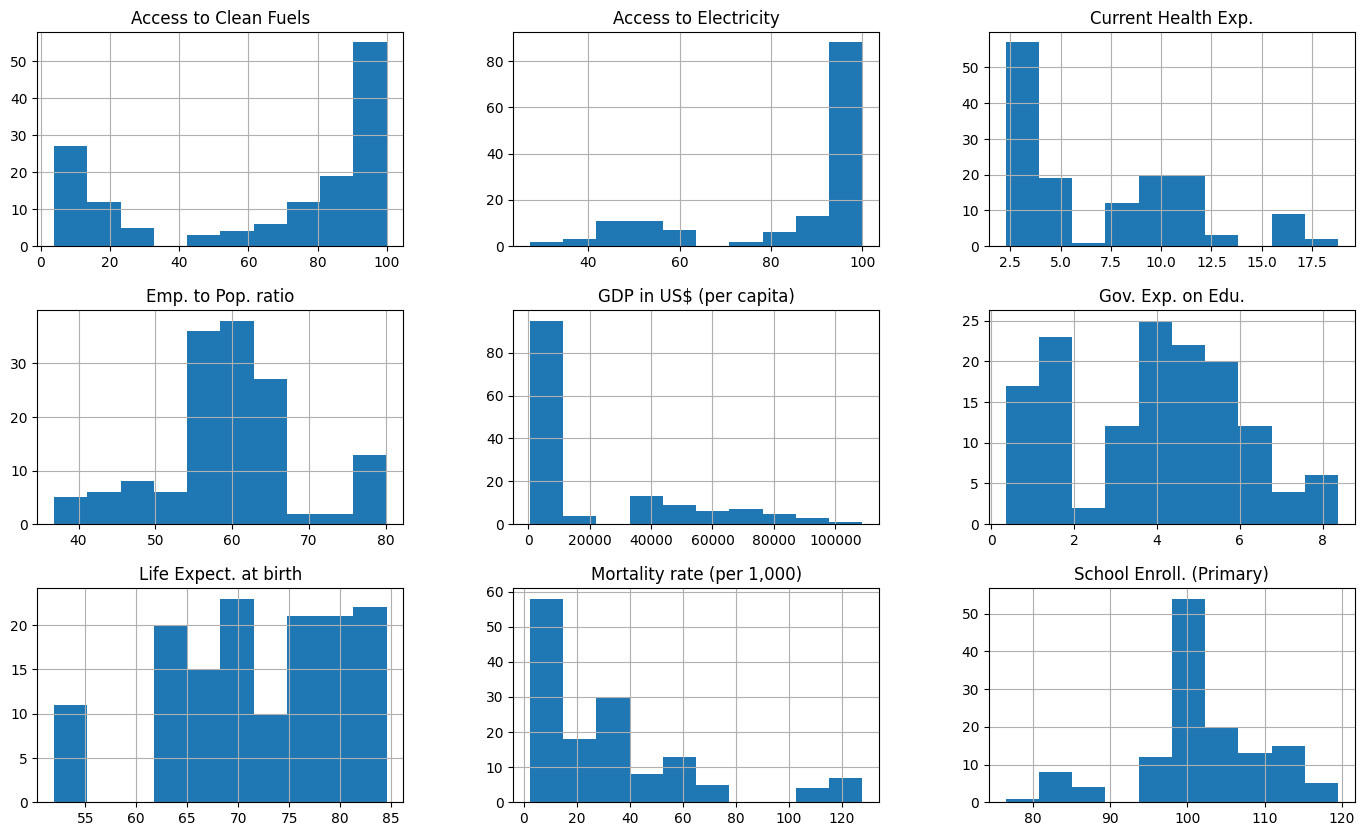

In [ ]:
df3[['Access to Clean Fuels', 'Access to Electricity',
       'Current Health Exp.', 'Emp. to Pop. ratio', 'GDP in US$ (per capita)',
       'Gov. Exp. on Edu.', 'Life Expect. at birth',
       'Mortality rate (per 1,000)', 'School Enroll. (Primary)']].hist(figsize=(17, 10))
plt.show()

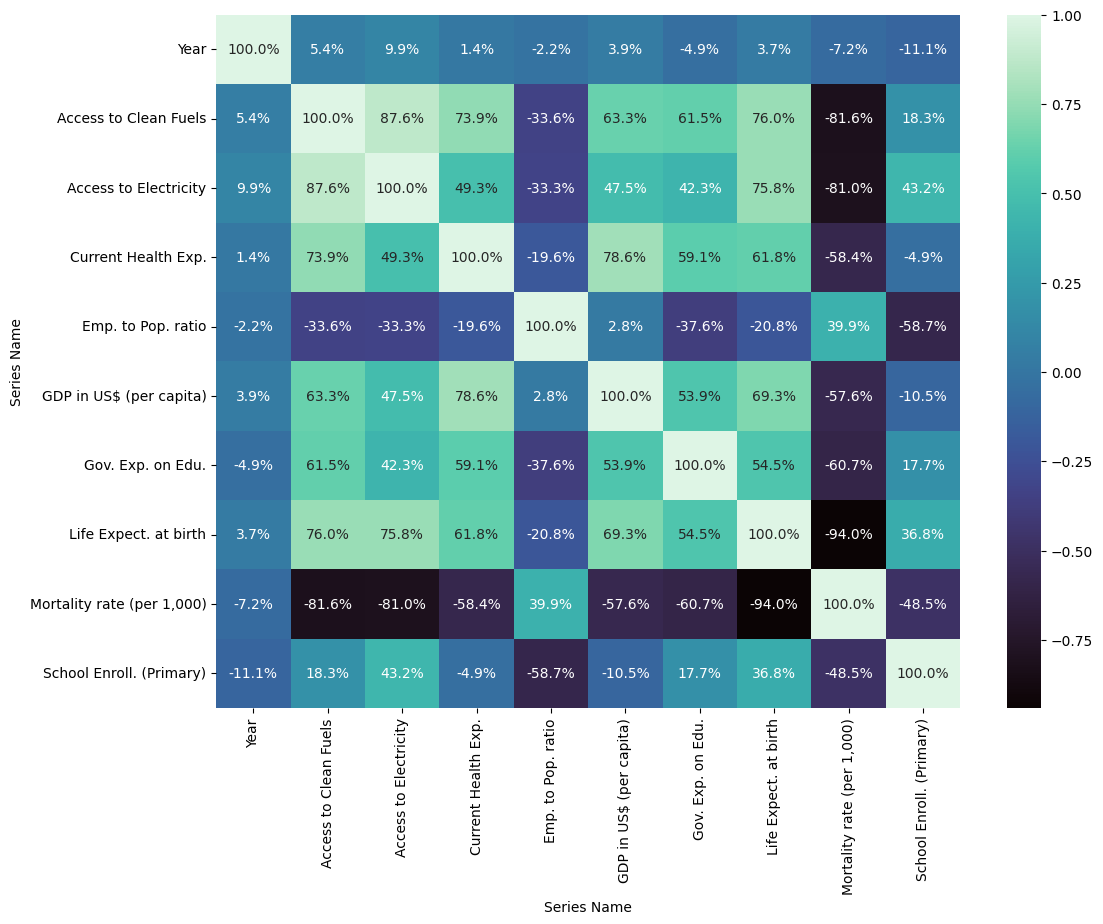

In [ ]:
plt.figure(figsize=(12, 9))
sns.heatmap(df3.corr(numeric_only=True), annot=True, fmt=".1%", cmap='mako')
plt.show()

From above Heatmap, we can observe the highly correlated features.

In [ ]:
# Which countries have made the most significant progress in basic infrastructure (electricity, clean cooking fuels),
# and how does this progress align with improvements in health and education?

In [ ]:
sns.set_theme(style='darkgrid')

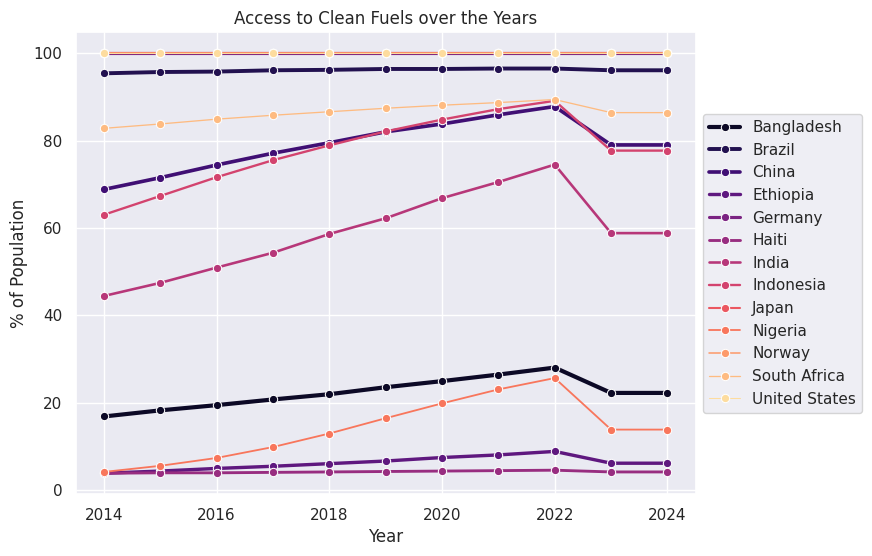

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(df3, x='Year', y='Access to Clean Fuels', hue='Country', size='Country', palette='magma', marker='o')
plt.title('Access to Clean Fuels over the Years')
plt.ylabel('% of Population')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

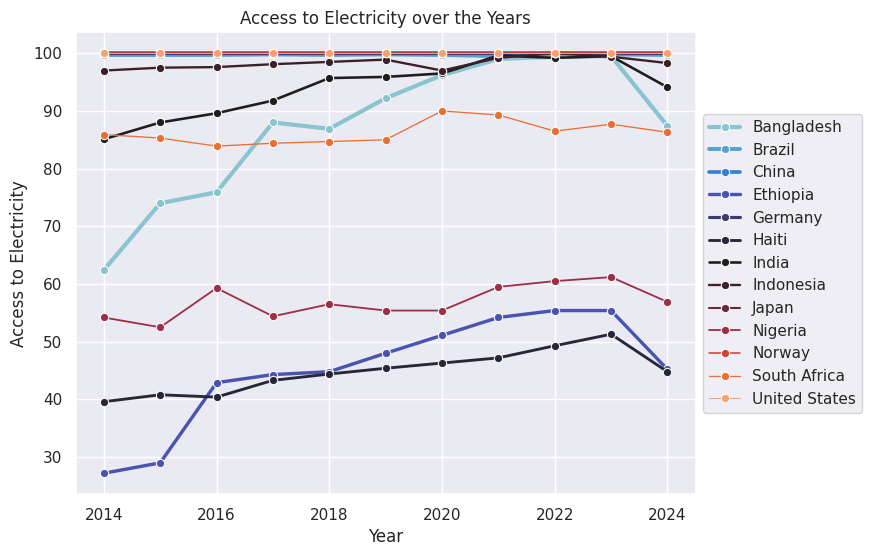

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(df3, x='Year', y='Access to Electricity', hue='Country', size='Country', palette='icefire', marker='o')
plt.title('Access to Electricity over the Years')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Just by observing the plot of increasing infrastructures we can say that countries India, China, Indonesia have shown great progress in both kind of Infrastruture (we are not taking about the already developed countries that have nearly 95% in both, we are considering the developing ones)

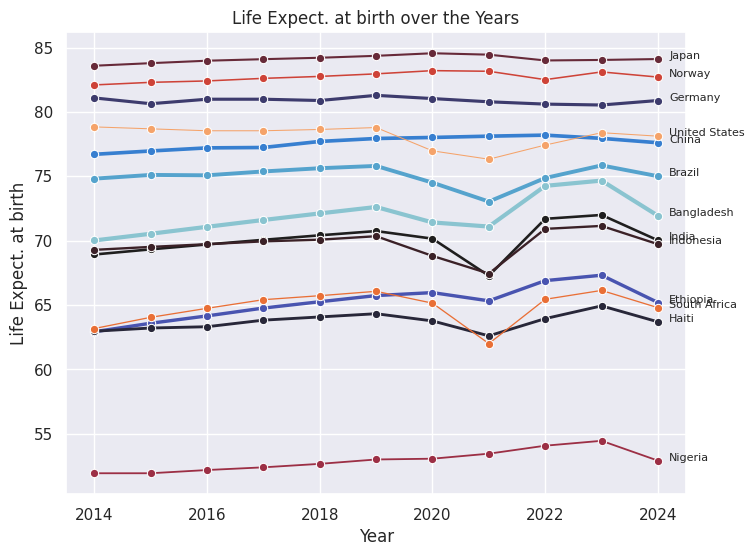

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(df3, x='Year', y='Life Expect. at birth', hue='Country', size='Country', palette='icefire', marker='o')
for country in df3['Country'].unique():
    d = df3[df3['Country'] == country]
    last = d[d['Year'] == d['Year'].max()]
    plt.text(last['Year'].values[0] + 0.2, last['Life Expect. at birth'].values[0], country, fontsize=8)
plt.title('Life Expect. at birth over the Years')
plt.legend('', frameon=False)
plt.show()

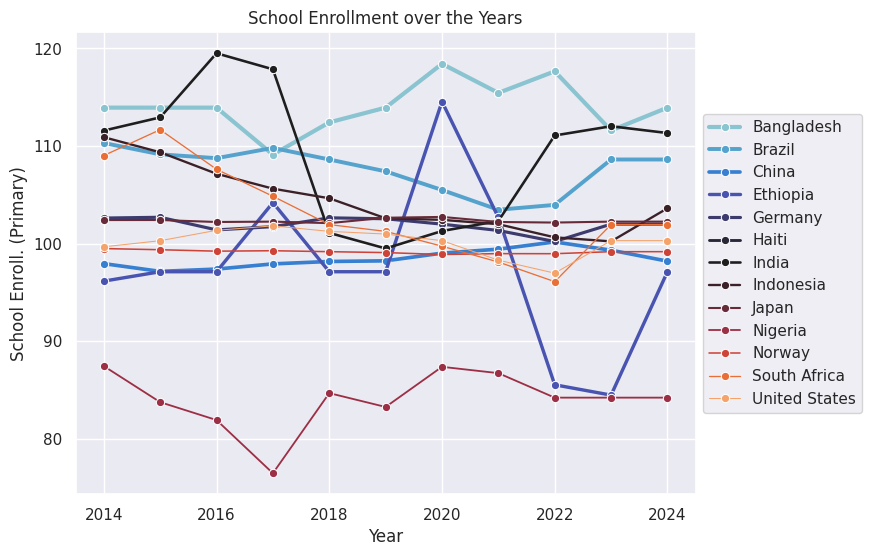

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(df3, x='Year', y='School Enroll. (Primary)', hue='Country', size='Country', palette='icefire', marker='o')
plt.title('School Enrollment over the Years')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Now checking for the countries of increasing infrastructures like China, India, Indonesia have shown a better progress and maintainability in both factors (Life Expectency, School Enrollment)

Now after considering the above 2 plots the school enrollment is terrible in countries like Ethopia, Nigeria, Haiti due to inconsistency in provide basic essentials.

On the other Hand, Countries with a highly consistent and good Infrastructure Management have maintained good life expectency as well as good school enrollment rate like Japan, Germany, USA.

In [ ]:
# To what extent does GDP per capita predict improvements in human development indicators like school enrollment and health expenditure?

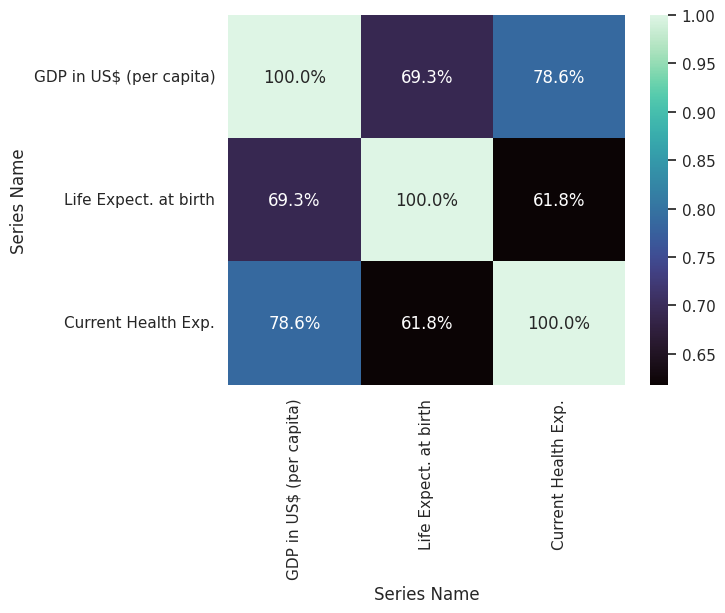

In [ ]:
corr_mat = df3[['GDP in US$ (per capita)', 'Life Expect. at birth', 'Current Health Exp.']].corr(numeric_only=True)
sns.heatmap(corr_mat, annot=True, fmt=".1%", cmap='mako')
plt.show()

We get a clear understanding by seeign above plot that GDP per capita has high correlation with Current Health Exp. but moderate with Life Expectency.

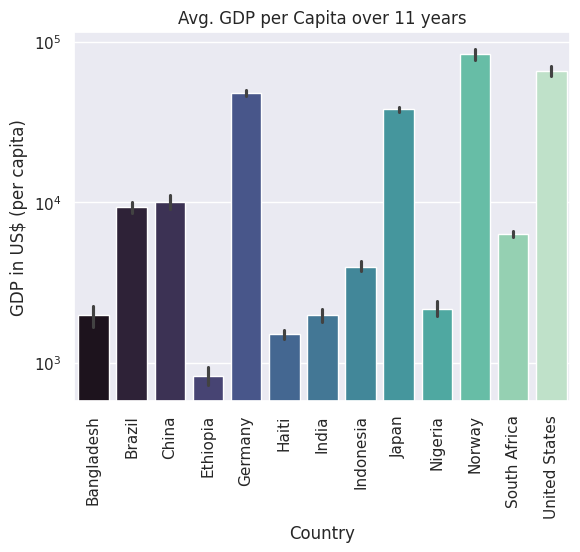

In [ ]:
sns.barplot(df3, x='Country', y='GDP in US$ (per capita)', hue='Country', palette='mako')
plt.title('Avg. GDP per Capita over 11 years')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

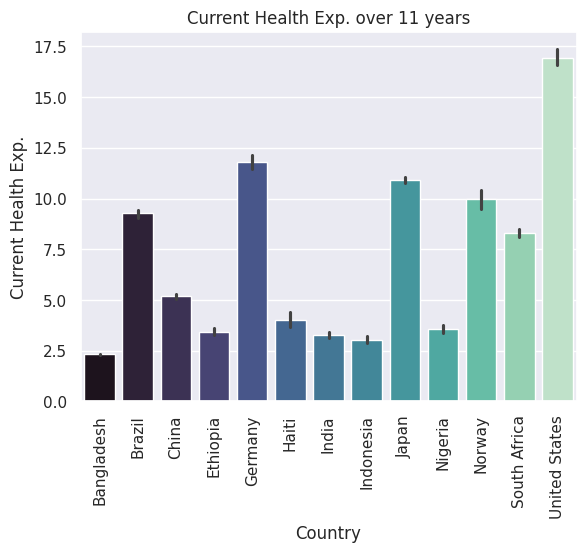

In [ ]:
sns.barplot(df3, x='Country', y='Current Health Exp.', hue='Country', palette='mako')
plt.title('Current Health Exp. over 11 years')
plt.xticks(rotation=90)
plt.show()

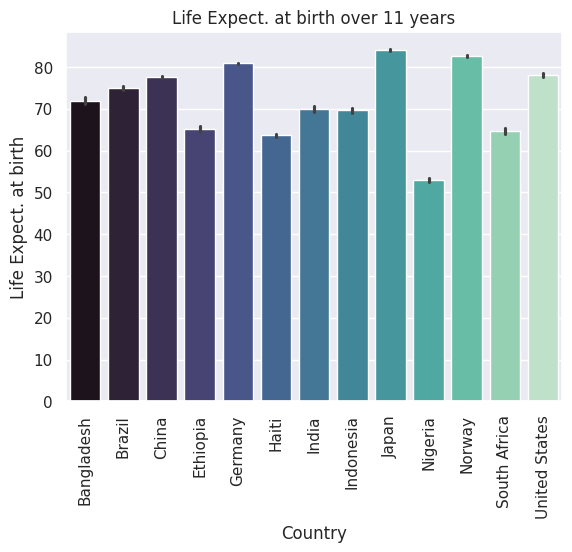

In [ ]:
sns.barplot(df3, x='Country', y='Life Expect. at birth', hue='Country', palette='mako')
plt.title('Life Expect. at birth over 11 years')
plt.xticks(rotation=90)
plt.show()

As expected,  GDP per capita has high correlation with Current Health Exp.

In [ ]:
# What clusters or patterns emerge when countries are grouped based on multi-indicator profiles (e.g., health, education, infrastructure, economy)?

In [ ]:
df4 = df3.dropna(subset=['Access to Clean Fuels', 'Access to Electricity', 'Current Health Exp.', 'Life Expect. at birth', 'School Enroll. (Primary)', 'GDP in US$ (per capita)'])

df_group = df4.groupby('Country').agg({'Access to Clean Fuels': 'mean', 'Access to Electricity': 'mean',
                                       'Current Health Exp.': 'mean', 'Life Expect. at birth': 'mean', 'School Enroll. (Primary)': 'mean',
                                       'GDP in US$ (per capita)': 'mean'}).reset_index()

df_group['Avg_Infra'] = (df_group['Access to Clean Fuels'] + df_group['Access to Electricity']) / 2
df_group['Avg_Dev'] = (df_group['Life Expect. at birth'] + df_group['School Enroll. (Primary)'] + df_group['Current Health Exp.']) / 3

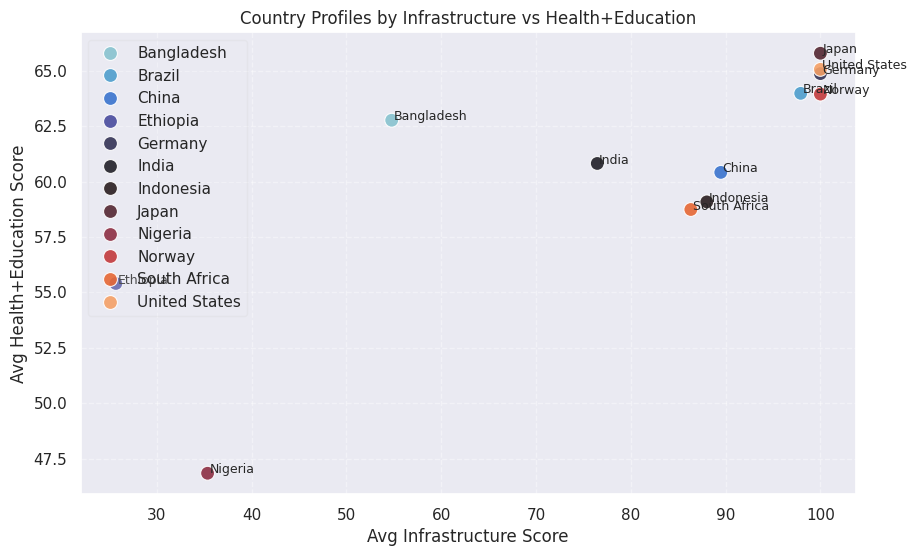

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df_group, x='Avg_Infra', y='Avg_Dev', hue='Country', palette='icefire', s=100, alpha=0.9)

for i in range(len(df_group)):
    plt.text(df_group['Avg_Infra'][i]+0.2, df_group['Avg_Dev'][i], df_group['Country'][i], fontsize=9)

plt.title('Country Profiles by Infrastructure vs Health+Education')
plt.xlabel('Avg Infrastructure Score')
plt.ylabel('Avg Health+Education Score')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(loc='upper left', framealpha=0.2)
plt.show()

So, I think we have found out which are the features with good resemblence and others are not that good features(has low correlation with any other features) like Employment to population ratio, 15+, total (%) (modeled ILO estimate),Government expenditure on education, total (% of GDP)

The Insights we got from this data are :->


---


Countries that have improved infrastructure (such as access to clean fuels and electricity) tend to show parallel improvements in life expectancy, primary school enrollment, and health expenditure.
eg. Norway and Japan have near-universal clean fuel access and life expectancy >82 years.

Higher GDP per capita strongly correlates with greater health spending and better education outcomes.
For example, USA and Germany spend significantly more on health (as % of GDP) and maintain high education enrollment.

A clear downward trend in mortality rates is observed in countries with better infrastructure and health access, such as Brazil and Germany.

Countries can be grouped into development tiers:

Tier 1: Norway, Japan, USA, Germany — stable, mature systems

Tier 2: Brazil, South Africa — rapidly improving

Tier 3: Countries with limited infrastructure and low GDP still lag in key human development areas

In Conclusion, Countries like Japan, Norway, and the USA showcase high performance in key development indicators — strong infrastructure, high GDP, and public investment in health and education. These fundamentals enable them to lead globally not just economically, but also in innovation, space, and technology.